# Initialisation

## Importing modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime

## Set option for  rows and columns in VSCode

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Creating DataFrame

In [4]:
df = pd.read_csv('Chennai houseing sale.csv', index_col = False)

# Exploratory Data Analysis (EDA)

## Knowing the data

In [5]:
# To have a real idea about the data

df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
#To get general information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
# To have a more statistical idea about the df
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [8]:
#To see the number of NaN values in df
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Since the number of NaNs are small, removing it won't affect the prediction much.
So, we will be removing the NaN values.

## Data Cleaning

This involves removing typos,removing NaN values, changing formats and altering data types

In [9]:
# Trying to see all data types
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [10]:
# Correcting the FORMAT of some columns to more sensible ones

df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')

In [11]:
# We will now drop Nan values

df.dropna(inplace = True)

In [12]:
# As we can see data dropped successfully

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int64         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int64         
 5   N_BEDROOM      7056 non-null   float64       
 6   N_BATHROOM     7056 non-null   float64       
 7   N_ROOM         7056 non-null   int64         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  MZZONE         7056 non-null   object        
 15  QS_ROOMS       7056 n

In [13]:
# To see all the unique values in each columns
df.nunique()

PRT_ID           7056
AREA               17
INT_SQFT         1698
DATE_SALE        2794
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5773
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          6986
COMMIS           6960
SALES_PRICE      7005
dtype: int64

In [14]:
# Actually seeing all the unique values

for col in df:
    print(col)
    print(df[col].unique())
    print()
    
# Now we will see interesting data in these
# Look for typos and stuff

PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

INT_SQFT
[1004 1986  909 ...  688 2051  598]

DATE_SALE
['2011-05-04T00:00:00.000000000' '2006-12-19T00:00:00.000000000'
 '2012-02-04T00:00:00.000000000' ... '2014-03-28T00:00:00.000000000'
 '2006-08-25T00:00:00.000000000' '2005-07-13T00:00:00.000000000']

DIST_MAINROAD
[131  26  70  14  84  36 137 176 175  74  78 143  83 157 134  69 168  53
  96 114 100 111 105  29  59 185 138 173  15 117  16 130  46 180  52  86
  49 113  28  51  19 167 126  75 154  25 187 200  32  11  23  13  58  89
  48 177 116  41 192  72 148  24  43  85 171  73  62 145 125 121 129   6
 103   8  50  67   0 147  71  34 178 106 144 135  38  40 142  79  20  99
 166  63  44  60  90 169 122 108  98  57 104   1 109 164 136  97  37   9
 181  93  81 193  95 196  39 14

In [15]:
# Printing unique values of interesting columns

interesting_columns = ['MZZONE','STREET','UTILITY_AVAIL','BUILDTYPE','PARK_FACIL','SALE_COND','AREA']
for i in interesting_columns:
    print(i)
    print(df[i].unique())
    # print()

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']
STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']
PARK_FACIL
['Yes' 'No' 'Noo']
SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']


In [16]:
# Removing typos

df['AREA'].replace(['Ana Nagar','Ann Nagar'], 'Anna Nagar',inplace = True)
df['AREA'].replace(['KKNagar'], 'KK Nagar',inplace = True)
df['AREA'].replace(['TNagar'], 'T Nagar',inplace = True)
df['AREA'].replace(['Karapakam'], 'Karapakkam',inplace = True)
df['AREA'].replace(['Adyr'], 'Adyar',inplace = True)
df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'], 'Chrompet',inplace = True)

df["STREET"].replace(['Pavd'],"Paved",inplace = True)
df["STREET"].replace(['NoAccess'],"No Access",inplace = True)

df["UTILITY_AVAIL"].replace(['AllPub'],"All Pub",inplace = True)
df["UTILITY_AVAIL"].replace(['NoSewa','NoSewr ','NoSeWa'],"No Sewer",inplace = True)

df["BUILDTYPE"].replace(['Comercial'],"Commercial",inplace = True)
df["BUILDTYPE"].replace(['Others'],"Other",inplace = True)

df["PARK_FACIL"].replace(['Noo'],"No",inplace = True)

df["SALE_COND"].replace(['Ab Normal'],"AbNormal",inplace = True)
df["SALE_COND"].replace(['Adj Land'],"AdjLand",inplace = True)
df["SALE_COND"].replace(['Partiall',"PartiaLl"],"Partial",inplace = True)


In [17]:
# Converting the datatypes into more sensible ones

df.N_BEDROOM = df.N_BEDROOM.astype(int)
df.N_BATHROOM = df.N_BATHROOM.astype(int)

In [18]:
# to make sure that all typos have been corrected

for col in df:
    print(col)
    print(df[col].unique())
    print()

PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar' 'Velchery']

INT_SQFT
[1004 1986  909 ...  688 2051  598]

DATE_SALE
['2011-05-04T00:00:00.000000000' '2006-12-19T00:00:00.000000000'
 '2012-02-04T00:00:00.000000000' ... '2014-03-28T00:00:00.000000000'
 '2006-08-25T00:00:00.000000000' '2005-07-13T00:00:00.000000000']

DIST_MAINROAD
[131  26  70  14  84  36 137 176 175  74  78 143  83 157 134  69 168  53
  96 114 100 111 105  29  59 185 138 173  15 117  16 130  46 180  52  86
  49 113  28  51  19 167 126  75 154  25 187 200  32  11  23  13  58  89
  48 177 116  41 192  72 148  24  43  85 171  73  62 145 125 121 129   6
 103   8  50  67   0 147  71  34 178 106 144 135  38  40 142  79  20  99
 166  63  44  60  90 169 122 108  98  57 104   1 109 164 136  97  37   9
 181  93  81 193  95 196  39 141 158 174  94 124  82  76 190 194  54  64
  65 115  17 102  77 182 163  88  66 119  18 188 112

## Feature Engineering

Let's design two new features AGE_BUILT and AGE_SALE.

In [19]:
# AGE_BUILD

TODAY = datetime.strptime('30-09-2022','%d-%m-%Y')
x=TODAY - df.DATE_BUILD

l=[]
for i in range(0,len(x)):
    k =str(x.iloc[i]).split()
    x.iloc[i] = (int(k[0])/365)
df['AGE_BUILD'] =x
df.AGE_BUILD = df.AGE_BUILD.astype(float)

In [20]:
# AGE_SALE

TODAY = datetime.strptime('30-09-2022','%d-%m-%Y')
y=TODAY - df.DATE_SALE
l=[]
for i in range(0,len(y)):
    k =str(y.iloc[i]).split()
    y.iloc[i] = (int(k[0])/365)
df['AGE_SALE'] = y
df.AGE_SALE = df.AGE_SALE.astype(float)

Thus we've created two extra features which may have a high role in predicting price

## Data Visualization

To see the relationship between columns and to know which columns are valuable in output prediction

### Plotting heatmap

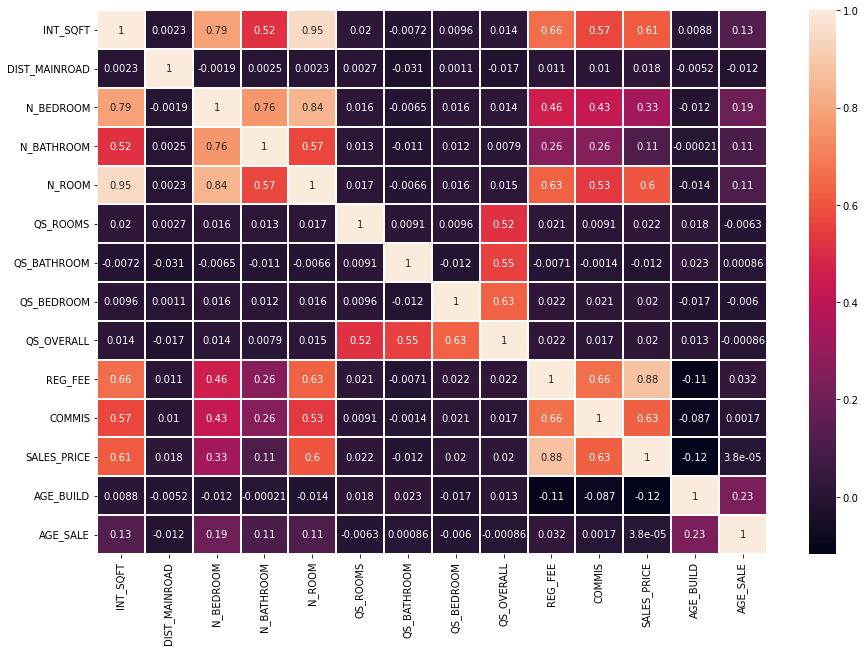

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=.2)
plt.show()

From the heatmap, we can know how much one column depend on the other.
This is way better than randomly expecting a factor to play a role in the value of the prediction.

In this heatmap, the prediction we want to make is about the sales price.
We can clearly see that the major columns affecting sales price appear to be:

        INT_SQFT
        N_ROOM
        REG_FEES
        COMMIS
        N_BEDROOM
        N_BATHROOM

It has weak co-relation with

        DIST_MAINROAD
        QS_ROOMS
        QS_BEDROOM
        QS_OVERALL
        AGE_SALE      ## ENGINERED FEATURE

It may also possess relationship with

        AREA
        AGE_SALE      ## Though their feature engineered pair doesn't seem useful 
        AGE_BUILD     ## Though their feature engineered pair doesn't seem useful 
        SALE_COND
        PARK_FACILITY
        BUILD_TYPE
        UTILITY_AVAIL
        STREET
        MZZONE

These were not plotted on the heatmap, as they were not numbers.


So, the heatmap has given us a lot of intuition about the model.
Now let's go and plot the relation of each of these features with SALES_PRICE.

Now I am supposed to visualize each and every feature and decide how to use them. 
I can do that, but I dont know how to apply them to the ML model.
So I am skipping that part.
Let's move to the random forest model creation.

# Random Forest Model

## Defining the features

In [22]:
y=df['SALES_PRICE'].values
X = df[["INT_SQFT",
        'N_ROOM',
        'REG_FEE',
        'COMMIS',
        'N_BEDROOM',
        "N_BATHROOM"]]

# X = df.drop('SALES_PRICE',axis =1).values


## Train Test split

In [23]:
print(len(X))
print(len(y))

trainX,valX,trainy,valy = train_test_split(X,y,test_size = .3)

7056
7056


## Making a prediction

In [24]:
forest_model = RandomForestRegressor()
forest_model.fit(trainX,trainy)
prediction = forest_model.predict(valX)
prediction

array([10692181. ,  6493487.2, 10740820.5, ..., 12833766.1, 10961185.8,
       10731310.2])

In [25]:
print("MEAN ABSOLUTE ERROR :( =", mean_absolute_error(valy, prediction))

MEAN ABSOLUTE ERROR :( = 1032618.5454416627
